<a href="https://colab.research.google.com/github/ttoygar/CatsAndDogsTransferLearning/blob/main/Transfer_Learning_Cats_Dogs_MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications import ResNet50

In [2]:
# DATADIR = "/content/drive/MyDrive/DATASCI/kagglecatsanddogs/PetImages"

# with open(os.path.join(DATADIR, "catsndogs.pickle"),"rb") as f:
#     data = pickle.load(f)

# X_train = data["X_train"]
# X_test = data["X_test"]
# X_val = data["X_val"]
# y_train = data["y_train"]
# y_test = data["y_test"]
# y_val = data["y_val"]

In [3]:
X_train = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/y_train.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/y_val.pickle", "rb"))

X_test = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/DATASCI/kagglecatsanddogs/pickles/y_test.pickle", "rb"))

In [4]:
IMG_SIZE = 64
NUM_CLASSES = 2
INPUT_SHAPE = (128,128,3)

In [5]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', input_shape=INPUT_SHAPE))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
y_val.shape

(200,)

In [19]:
train_model = model.fit(
    X_train, 
    y_train,
    batch_size=128,
    epochs=25,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/25
13/13 [==============================] - 5s 213ms/step - loss: 0.5390 - accuracy: 0.7375 - val_loss: 0.5681 - val_accuracy: 0.7050
Epoch 2/25
13/13 [==============================] - 2s 142ms/step - loss: 0.5385 - accuracy: 0.7369 - val_loss: 0.5691 - val_accuracy: 0.7000
Epoch 3/25
13/13 [==============================] - 2s 141ms/step - loss: 0.5378 - accuracy: 0.7406 - val_loss: 0.5683 - val_accuracy: 0.7100
Epoch 4/25
13/13 [==============================] - 2s 141ms/step - loss: 0.5379 - accuracy: 0.7394 - val_loss: 0.5682 - val_accuracy: 0.7050
Epoch 5/25
13/13 [==============================] - 2s 142ms/step - loss: 0.5381 - accuracy: 0.7412 - val_loss: 0.5704 - val_accuracy: 0.7050
Epoch 6/25
13/13 [==============================] - 2s 142ms/step - loss: 0.5377 - accuracy: 0.7375 - val_loss: 0.5684 - val_accuracy: 0.7100
Epoch 7/25
13/13 [==============================] - 2s 145ms/step - loss: 0.5370 - accuracy: 0.7400 - val_loss: 0.5685 - val_accuracy: 0.6950
Epoch 

In [20]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 45ms/step - loss: 0.6160 - accuracy: 0.6900


[0.6160270571708679, 0.6899999976158142]

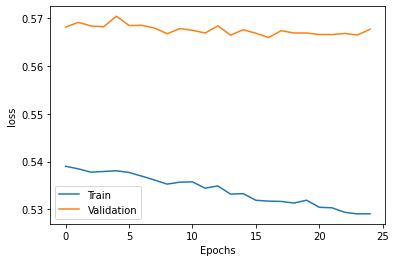

In [21]:
plt.plot(train_model.history["loss"], label="Train")
plt.plot(train_model.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

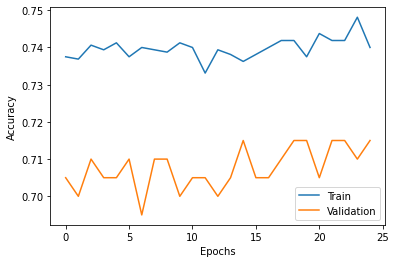

In [22]:
plt.plot(train_model.history["accuracy"], label="Train")
plt.plot(train_model.history["val_accuracy"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [24]:
model.save("catsanddogs_model")